In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore useless warnings
import warnings
warnings.filterwarnings('ignore')

In [78]:
df = pd.read_csv("../Datasets/UFO-dataset/scrubbed.csv", low_memory=False)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [80]:
df = df.rename(columns={"datetime":"Datetime",
           "city":"City",
           "state":"State",
           "country":"Country",
           "shape":"Shape",
           "duration (seconds)": "Duration (seconds)",
           "duration (hours/min)": "Duration (hours/min)",
           "comments":"Comments",
           "date posted":"Date_Posted",
           "latitude":"Latitude",
           "longitude":"Longitude",
           })

In [81]:
df.head()

,Datetime,City,State,Country,Shape,Duration (seconds),Duration (hours/min),Comments,Date_Posted,Latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


## Data Cleaning tasks:
* Split the dates from time
* Transfrom string into datetime obj
* Capitalize States name
* Capitalize country names

### Spliting the datime column and data transformation

In [82]:
df["Year"] = df["Datetime"].str.split(" ").str[0]
df["Time"] = df["Datetime"].str.split(" ").str[1]
df = df.drop(columns=["Datetime"])

In [83]:
df.head()

,City,State,Country,Shape,Duration (seconds),Duration (hours/min),Comments,Date_Posted,Latitude,longitude,Year,Time
0,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,10/10/1949,20:30
1,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,10/10/1949,21:00
2,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,10/10/1955,17:00
3,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,10/10/1956,21:00
4,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,10/10/1960,20:00


In [84]:
df["Year"] = pd.to_datetime(df["Year"])
df["Date_Posted"] = pd.to_datetime(df["Date_Posted"])

In [85]:
df["State"] = df["State"].str.upper()
df["Country"] = df["Country"].str.upper()
df["Shape"] = df["Shape"].str.capitalize()
df["City"] = df["City"].str.capitalize()
df["City"] = df["City"].str.split("(").str[0]

In [86]:
df.head()

,City,State,Country,Shape,Duration (seconds),Duration (hours/min),Comments,Date_Posted,Latitude,longitude,Year,Time
0,San marcos,TX,US,Cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111,1949-10-10,20:30
1,Lackland afb,TX,NaN,Light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082,1949-10-10,21:00
2,Chester,NaN,GB,Circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667,1955-10-10,17:00
3,Edna,TX,US,Circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833,1956-10-10,21:00
4,Kaneohe,HI,US,Light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611,1960-10-10,20:00


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  80332 non-null  object        
 1   State                 74535 non-null  object        
 2   Country               70662 non-null  object        
 3   Shape                 78400 non-null  object        
 4   Duration (seconds)    80332 non-null  object        
 5   Duration (hours/min)  80332 non-null  object        
 6   Comments              80317 non-null  object        
 7   Date_Posted           80332 non-null  datetime64[ns]
 8   Latitude              80332 non-null  object        
 9   longitude             80332 non-null  float64       
 10  Year                  80332 non-null  datetime64[ns]
 11  Time                  80332 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(9)
memory usage: 7.4+ MB


## Questions:

1. Distribution of the sights

In [88]:
df["Country"].unique()
df["Country"] = df["Country"].replace({"US":"United States",
                                       "GB":"Great Britain",
                                       "CA":"Canada",
                                       "AU":"Australia",
                                       "DE":"Germany",})

In [89]:
df_count = df["Country"].value_counts().reset_index()
df_count

,Country,count
0,United States,65114
1,Canada,3000
2,Great Britain,1905
3,Australia,538
4,Germany,105


In [90]:
type(df_count)

pandas.core.frame.DataFrame

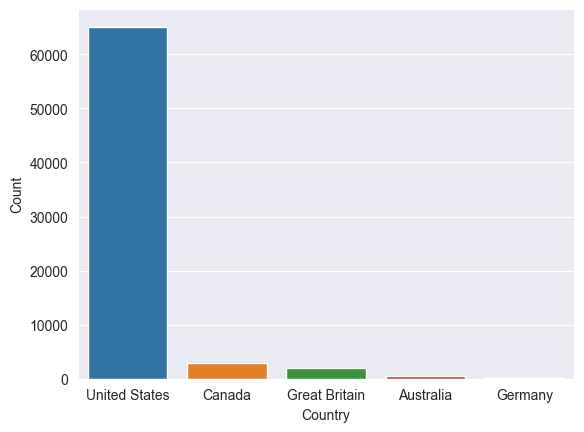

In [91]:
sns.barplot(x="Country", y="count", hue="Country", data=df_count)
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

1.1 Is there an area/region with more sights than others?

In [92]:
df_by_city_US = df.query("Country == 'United States'").groupby(["Country", "City"]).size().reset_index(name="Count").sort_values(by="Count", ascending=False)
df_by_city_US

,Country,City,Count
8493,United States,Seattle,524
7368,United States,Phoenix,454
6539,United States,New york city,399
7609,United States,Portland,373
5103,United States,Las vegas,367
...,...,...,...
10548,United States,York county,1
10549,United States,York springs,1
3547,United States,Glen house,1
5477,United States,Luverne,1


In [93]:
df_by_city_US["City"].nunique()

10588

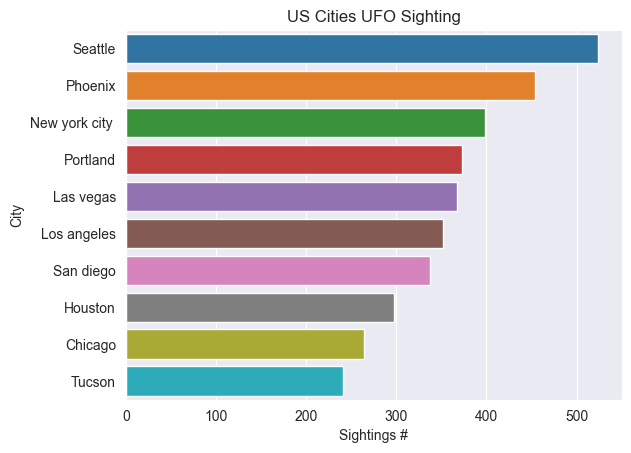

In [103]:
df_by_city_US_sorted = df_by_city_US.iloc[0:10].sort_values(by="Count", ascending=False)
sns.barplot(data=df_by_city_US_sorted, x="Count", y="City", orient="h", hue="City")
plt.xlabel("Sightings #")
plt.title("US Cities UFO Sightings")
plt.show()

In [95]:
df_by_city_CA = df.query("Country == 'Canada'").groupby(["Country", "City"]).size().reset_index(name="Count").sort_values(by="Count", ascending=False)
df_by_city_CA

,Country,City,Count
527,Canada,Toronto,177
537,Canada,Vancouver,100
366,Canada,Ottawa,88
74,Canada,Calgary,78
543,Canada,Victoria,78
...,...,...,...
519,Canada,Thorold,1
563,Canada,Wheatley,1
565,Canada,White river,1
569,Canada,Whitewood,1


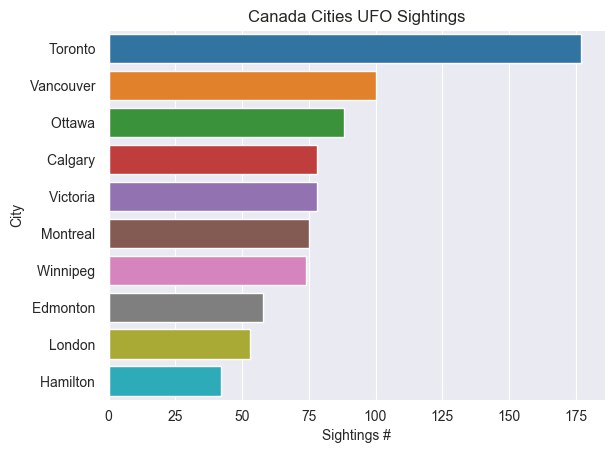

In [104]:
df_by_city_CA_sorted = df_by_city_CA.iloc[0:10].sort_values(by="Count", ascending=False)
sns.barplot(data=df_by_city_CA_sorted, x="Count", y="City", orient="h", hue="City")
plt.xlabel("Sightings #")
plt.title("Canada Cities UFO Sightings")

plt.show()

    2. Any correlation with season?

In [97]:
df_by_city_GB = df.query("Country == 'Great Britain'").groupby(["Country", "City"]).size().reset_index(name="Count").sort_values(by="Count", ascending=False)
df_by_city_GB

,Country,City,Count
318,Great Britain,London,206
50,Great Britain,Birmingham,62
331,Great Britain,Manchester,60
201,Great Britain,Glasgow,40
379,Great Britain,Nottingham,33
...,...,...,...
34,Great Britain,Barnstaple,1
37,Great Britain,Bathgate,1
38,Great Britain,Beaconsfield,1
40,Great Britain,Bedlington,1


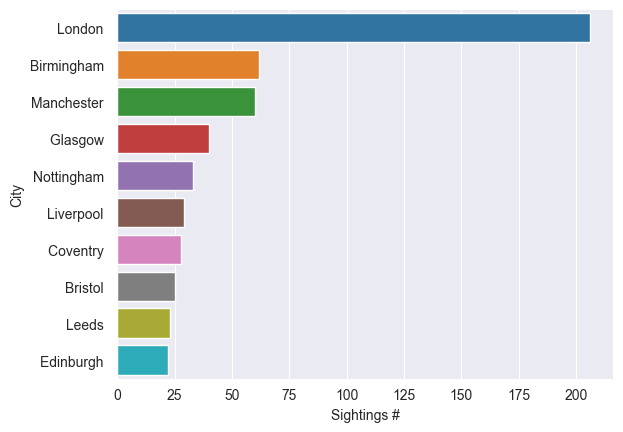

In [98]:
df_by_city_GB_sorted = df_by_city_GB.iloc[0:10].sort_values(by="Count", ascending=False)
sns.barplot(data=df_by_city_GB_sorted, x="Count", y="City", orient="h", hue="City")
plt.xlabel("Sightings #")
plt.title("Great Britain Cities UFO Sightings")
plt.show()

In [99]:
df_by_city_AU = df.query("Country == 'Australia'").groupby(["Country", "City"]).size().reset_index(name="Count").sort_values(by="Count", ascending=False)
df_by_city_AU

,Country,City,Count
138,Australia,Sydney,81
99,Australia,Melbourne,67
124,Australia,Perth,49
23,Australia,Brisbane,48
0,Australia,Adelaide,24
...,...,...,...
160,Australia,Woy woy,1
161,Australia,Wyong,1
162,Australia,Wyreema,1
163,Australia,Yandoit,1


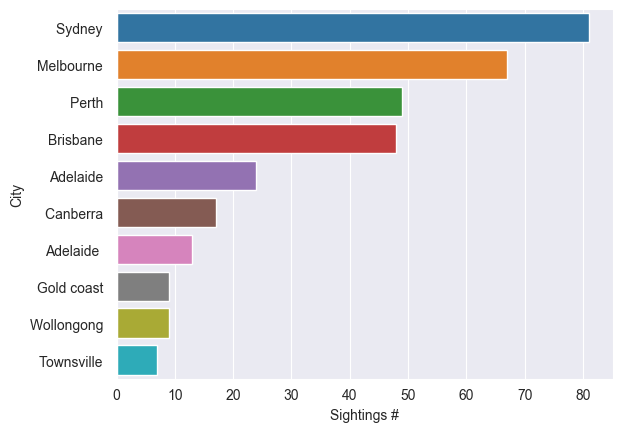

In [100]:
df_by_city_AU_sorted = df_by_city_AU.iloc[0:10].sort_values(by="Count", ascending=False)
sns.barplot(data=df_by_city_AU_sorted, x="Count", y="City", orient="h", hue="City")
plt.xlabel("Sightings #")
plt.title("Australia Cities UFO Sightings")
plt.show()

In [101]:
df_by_city_DE = df.query("Country == 'Germany'").groupby(["Country", "City"]).size().reset_index(name="Count").sort_values(by="Count", ascending=False)
df_by_city_DE

,Country,City,Count
7,Germany,Berlin,11
49,Germany,Munich,5
13,Germany,Bremen,3
1,Germany,Ansbach,3
5,Germany,Baumholder,2
...,...,...,...
74,Germany,Weissenburg,1
75,Germany,Werder,1
76,Germany,Wildflecken,1
77,Germany,Zehdenick,1


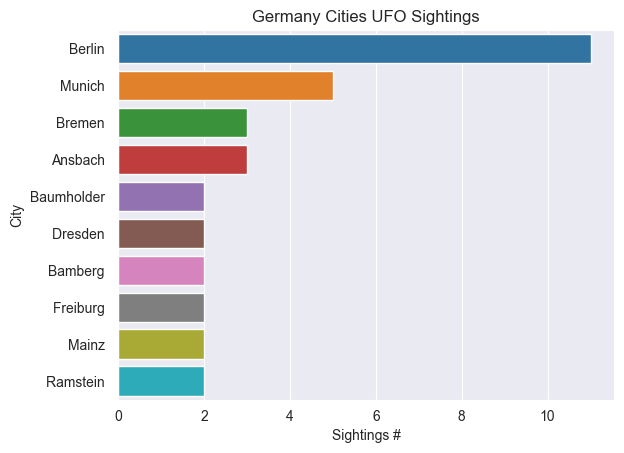

In [105]:
df_by_city_DE_sorted = df_by_city_DE.iloc[0:10].sort_values(by="Count", ascending=False)
sns.barplot(data=df_by_city_DE_sorted, x="Count", y="City", orient="h", hue="City")
plt.xlabel("Sightings #")
plt.title("Germany Cities UFO Sightings")
plt.show()

3. Reports by Year

4. Any Correlation with shape